In [71]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [72]:
df = pd.read_csv("nhanes32006data.csv")

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18414 entries, 0 to 18413
Data columns (total 33 columns):
Unnamed: 0    18414 non-null int64
age           18396 non-null float64
agestrat      18386 non-null object
sex           18414 non-null object
race          18414 non-null object
ses           18414 non-null float64
smokehx       18411 non-null object
bmi           16599 non-null float64
obese         16203 non-null object
htnhx         18252 non-null object
sbp           16168 non-null float64
dbp           16166 non-null float64
hdl           15605 non-null float64
ldl           6641 non-null float64
chol          15716 non-null float64
hldhx         17771 non-null float64
lowhdl        16636 non-null object
ldlstrata     6688 non-null object
cholstrata    16636 non-null object
trig          15681 non-null float64
hitrig        16636 non-null object
uralb         16203 non-null float64
ualbquart     16203 non-null object
higlu         15887 non-null object
hba1c         15887

In [74]:
df.head()

,Unnamed: 0,age,agestrat,sex,race,ses,smokehx,bmi,obese,htnhx,...,higlu,hba1c,dm,hf,stroke,mi,fasttime,fast,mortstat,PERMTH_INT
0,1,21.750000,21-35,male,non hispanic black,0.641,yes,25.5,no,hypertensive,...,no,5.3,no,no,no,no,6.52,no,alive,203.0
1,2,32.000000,21-35,female,non hispanic black,4.803,yes,23.4,yes,no,...,no,4.6,no,no,no,no,6.12,no,alive,201.0
2,3,48.583333,35-50,female,hispanic,3.747,no,27.6,yes,no,...,no,5.3,no,no,no,no,13.73,no,alive,201.0
3,4,35.666667,35-50,male,hispanic,5.406,yes,29.4,yes,hypertensive,...,no,4.6,no,no,no,no,15.45,no,alive,196.0
4,5,48.500000,35-50,male,non hispanic black,1.676,no,25.0,no,no,...,yes,9.1,diabetes,no,no,no,1.85,yes,alive,190.0


In [75]:
df.columns

Index(['Unnamed: 0', 'age', 'agestrat', 'sex', 'race', 'ses', 'smokehx', 'bmi',
       'obese', 'htnhx', 'sbp', 'dbp', 'hdl', 'ldl', 'chol', 'hldhx', 'lowhdl',
       'ldlstrata', 'cholstrata', 'trig', 'hitrig', 'uralb', 'ualbquart',
       'higlu', 'hba1c', 'dm', 'hf', 'stroke', 'mi', 'fasttime', 'fast',
       'mortstat', 'PERMTH_INT'],
      dtype='object')

In [76]:
df = df[['obese', 'uralb', 'trig', 'hdl', 'chol', 'hldhx', 'htnhx', 'sbp', 'dbp', 'bmi', 'smokehx', 'ses', 'race', 'sex', 'age', 'hf', 'stroke', 'mi', 'hba1c', 'mortstat']]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18414 entries, 0 to 18413
Data columns (total 20 columns):
obese       16203 non-null object
uralb       16203 non-null float64
trig        15681 non-null float64
hdl         15605 non-null float64
chol        15716 non-null float64
hldhx       17771 non-null float64
htnhx       18252 non-null object
sbp         16168 non-null float64
dbp         16166 non-null float64
bmi         16599 non-null float64
smokehx     18411 non-null object
ses         18414 non-null float64
race        18414 non-null object
sex         18414 non-null object
age         18396 non-null float64
hf          18383 non-null object
stroke      18403 non-null object
mi          18168 non-null object
hba1c       15887 non-null float64
mortstat    18387 non-null object
dtypes: float64(11), object(9)
memory usage: 2.8+ MB


In [78]:
df.shape

(18414, 20)

In [79]:
df.head()

,obese,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,smokehx,ses,race,sex,age,hf,stroke,mi,hba1c,mortstat
0,no,5.8,174.0,38.0,268.0,1.0,hypertensive,120.0,67.0,25.5,yes,0.641,non hispanic black,male,21.750000,no,no,no,5.3,alive
1,yes,2.2,84.0,55.0,160.0,1.0,no,126.0,86.0,23.4,yes,4.803,non hispanic black,female,32.000000,no,no,no,4.6,alive
2,yes,1.6,98.0,66.0,236.0,2.0,no,131.0,73.0,27.6,no,3.747,hispanic,female,48.583333,no,no,no,5.3,alive
3,yes,8.5,109.0,43.0,225.0,2.0,hypertensive,130.0,82.0,29.4,yes,5.406,hispanic,male,35.666667,no,no,no,4.6,alive
4,no,11.3,94.0,51.0,260.0,1.0,no,120.0,70.0,25.0,no,1.676,non hispanic black,male,48.500000,no,no,no,9.1,alive


In [80]:
num_columns = ['ses','hba1c','trig','sbp','dbp']

In [81]:
for var in num_columns:
    print(f'| {var:10} | Mean: {df[var].mean():7.2f} | Median: {df[var].median():.2f} | Max: {df[var].max():.2f} | Min: {df[var].min():.2f} |')

| ses        | Mean: 92830.01 | Median: 2.24 | Max: 888888.00 | Min: 0.00 |
| hba1c      | Mean:    5.58 | Median: 5.40 | Max: 16.20 | Min: 2.80 |
| trig       | Mean:  146.44 | Median: 116.00 | Max: 3616.00 | Min: 22.00 |
| sbp        | Mean:  126.31 | Median: 123.00 | Max: 244.00 | Min: 69.00 |
| dbp        | Mean:   74.54 | Median: 74.00 | Max: 142.00 | Min: 20.00 |


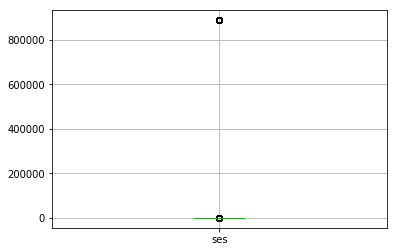

In [82]:
df[['ses']].boxplot()

In [83]:
df['ses'][df["ses"] == 888888.000] = np.nan

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18414 entries, 0 to 18413
Data columns (total 20 columns):
obese       16203 non-null object
uralb       16203 non-null float64
trig        15681 non-null float64
hdl         15605 non-null float64
chol        15716 non-null float64
hldhx       17771 non-null float64
htnhx       18252 non-null object
sbp         16168 non-null float64
dbp         16166 non-null float64
bmi         16599 non-null float64
smokehx     18411 non-null object
ses         16491 non-null float64
race        18414 non-null object
sex         18414 non-null object
age         18396 non-null float64
hf          18383 non-null object
stroke      18403 non-null object
mi          18168 non-null object
hba1c       15887 non-null float64
mortstat    18387 non-null object
dtypes: float64(11), object(9)
memory usage: 2.8+ MB


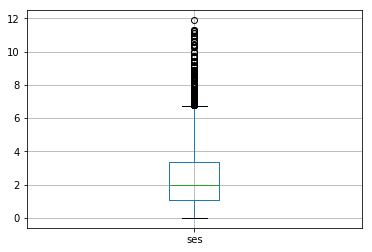

In [85]:
df[['ses']].boxplot()

In [86]:
for var in num_columns:
    print(f'| {var:15s} | Mean: {df[var].mean():7.2f} | Median: {df[var].median():7.2f} | Max: {df[var].max():7.2f} | Min: {df[var].min():7.2f} |')

| ses             | Mean:    2.44 | Median:    1.96 | Max:   11.89 | Min:    0.00 |
| hba1c           | Mean:    5.58 | Median:    5.40 | Max:   16.20 | Min:    2.80 |
| trig            | Mean:  146.44 | Median:  116.00 | Max: 3616.00 | Min:   22.00 |
| sbp             | Mean:  126.31 | Median:  123.00 | Max:  244.00 | Min:   69.00 |
| dbp             | Mean:   74.54 | Median:   74.00 | Max:  142.00 | Min:   20.00 |


In [87]:
df['htnhx'].value_counts()

no              12916
hypertensive     5336
Name: htnhx, dtype: int64

In [88]:
for var in df.columns:
    print(f'| {var :15s} | Missing: {df[var].isna().sum() : 15} |')

| obese           | Missing:            2211 |
| uralb           | Missing:            2211 |
| trig            | Missing:            2733 |
| hdl             | Missing:            2809 |
| chol            | Missing:            2698 |
| hldhx           | Missing:             643 |
| htnhx           | Missing:             162 |
| sbp             | Missing:            2246 |
| dbp             | Missing:            2248 |
| bmi             | Missing:            1815 |
| smokehx         | Missing:               3 |
| ses             | Missing:            1923 |
| race            | Missing:               0 |
| sex             | Missing:               0 |
| age             | Missing:              18 |
| hf              | Missing:              31 |
| stroke          | Missing:              11 |
| mi              | Missing:             246 |
| hba1c           | Missing:            2527 |
| mortstat        | Missing:              27 |


In [89]:
df.dropna().shape

(13059, 20)

In [90]:
df.shape

(18414, 20)

In [91]:
df = df.dropna()

In [92]:
df['htn_met'] = (df['sbp']>130) & (df['dbp']>85) & (df['htnhx']=='hypertensive')

In [93]:
df.head()

,obese,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,...,ses,race,sex,age,hf,stroke,mi,hba1c,mortstat,htn_met
0,no,5.8,174.0,38.0,268.0,1.0,hypertensive,120.0,67.0,25.5,...,0.641,non hispanic black,male,21.750000,no,no,no,5.3,alive,False
1,yes,2.2,84.0,55.0,160.0,1.0,no,126.0,86.0,23.4,...,4.803,non hispanic black,female,32.000000,no,no,no,4.6,alive,False
2,yes,1.6,98.0,66.0,236.0,2.0,no,131.0,73.0,27.6,...,3.747,hispanic,female,48.583333,no,no,no,5.3,alive,False
3,yes,8.5,109.0,43.0,225.0,2.0,hypertensive,130.0,82.0,29.4,...,5.406,hispanic,male,35.666667,no,no,no,4.6,alive,False
4,no,11.3,94.0,51.0,260.0,1.0,no,120.0,70.0,25.0,...,1.676,non hispanic black,male,48.500000,no,no,no,9.1,alive,False


In [94]:
df['hba1c_met'] = df['hba1c']>5.7

In [95]:
df.head()

,obese,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,...,race,sex,age,hf,stroke,mi,hba1c,mortstat,htn_met,hba1c_met
0,no,5.8,174.0,38.0,268.0,1.0,hypertensive,120.0,67.0,25.5,...,non hispanic black,male,21.750000,no,no,no,5.3,alive,False,False
1,yes,2.2,84.0,55.0,160.0,1.0,no,126.0,86.0,23.4,...,non hispanic black,female,32.000000,no,no,no,4.6,alive,False,False
2,yes,1.6,98.0,66.0,236.0,2.0,no,131.0,73.0,27.6,...,hispanic,female,48.583333,no,no,no,5.3,alive,False,False
3,yes,8.5,109.0,43.0,225.0,2.0,hypertensive,130.0,82.0,29.4,...,hispanic,male,35.666667,no,no,no,4.6,alive,False,False
4,no,11.3,94.0,51.0,260.0,1.0,no,120.0,70.0,25.0,...,non hispanic black,male,48.500000,no,no,no,9.1,alive,False,True


In [96]:
df['trig_met'] = df['trig']>150

In [97]:
df.head()

,obese,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,...,sex,age,hf,stroke,mi,hba1c,mortstat,htn_met,hba1c_met,trig_met
0,no,5.8,174.0,38.0,268.0,1.0,hypertensive,120.0,67.0,25.5,...,male,21.750000,no,no,no,5.3,alive,False,False,True
1,yes,2.2,84.0,55.0,160.0,1.0,no,126.0,86.0,23.4,...,female,32.000000,no,no,no,4.6,alive,False,False,False
2,yes,1.6,98.0,66.0,236.0,2.0,no,131.0,73.0,27.6,...,female,48.583333,no,no,no,5.3,alive,False,False,False
3,yes,8.5,109.0,43.0,225.0,2.0,hypertensive,130.0,82.0,29.4,...,male,35.666667,no,no,no,4.6,alive,False,False,False
4,no,11.3,94.0,51.0,260.0,1.0,no,120.0,70.0,25.0,...,male,48.500000,no,no,no,9.1,alive,False,True,False


In [98]:
df['hdl_met'] = ((df['sex'] == 'male') & (df['hdl'] < 40)) | ((df['sex'] == 'female') & (df['hdl'] < 50))

In [99]:
df.head()

,obese,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,...,age,hf,stroke,mi,hba1c,mortstat,htn_met,hba1c_met,trig_met,hdl_met
0,no,5.8,174.0,38.0,268.0,1.0,hypertensive,120.0,67.0,25.5,...,21.750000,no,no,no,5.3,alive,False,False,True,True
1,yes,2.2,84.0,55.0,160.0,1.0,no,126.0,86.0,23.4,...,32.000000,no,no,no,4.6,alive,False,False,False,False
2,yes,1.6,98.0,66.0,236.0,2.0,no,131.0,73.0,27.6,...,48.583333,no,no,no,5.3,alive,False,False,False,False
3,yes,8.5,109.0,43.0,225.0,2.0,hypertensive,130.0,82.0,29.4,...,35.666667,no,no,no,4.6,alive,False,False,False,False
4,no,11.3,94.0,51.0,260.0,1.0,no,120.0,70.0,25.0,...,48.500000,no,no,no,9.1,alive,False,True,False,False


In [100]:
df['obese'] = (df['obese'] == 'yes')

In [101]:
df.head()

,obese,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,...,age,hf,stroke,mi,hba1c,mortstat,htn_met,hba1c_met,trig_met,hdl_met
0,False,5.8,174.0,38.0,268.0,1.0,hypertensive,120.0,67.0,25.5,...,21.750000,no,no,no,5.3,alive,False,False,True,True
1,True,2.2,84.0,55.0,160.0,1.0,no,126.0,86.0,23.4,...,32.000000,no,no,no,4.6,alive,False,False,False,False
2,True,1.6,98.0,66.0,236.0,2.0,no,131.0,73.0,27.6,...,48.583333,no,no,no,5.3,alive,False,False,False,False
3,True,8.5,109.0,43.0,225.0,2.0,hypertensive,130.0,82.0,29.4,...,35.666667,no,no,no,4.6,alive,False,False,False,False
4,False,11.3,94.0,51.0,260.0,1.0,no,120.0,70.0,25.0,...,48.500000,no,no,no,9.1,alive,False,True,False,False


In [102]:
meta_column = ['obese','hdl_met','trig_met','htn_met','hba1c_met']
for var in meta_column:
    print(f'| {var :15s} | Positive: {df[var].sum() : 15} |')

| obese           | Positive:            5976 |
| hdl_met         | Positive:            4799 |
| trig_met        | Positive:            4184 |
| htn_met         | Positive:             829 |
| hba1c_met       | Positive:            3182 |


In [103]:
df[meta_column].head()

,obese,hdl_met,trig_met,htn_met,hba1c_met
0,False,True,True,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,True,False,False,False,False
4,False,False,False,False,True


In [104]:
df['metabolic'] = df[meta_column].sum(axis=1)>=3

In [105]:
df.head()

,obese,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,...,hf,stroke,mi,hba1c,mortstat,htn_met,hba1c_met,trig_met,hdl_met,metabolic
0,False,5.8,174.0,38.0,268.0,1.0,hypertensive,120.0,67.0,25.5,...,no,no,no,5.3,alive,False,False,True,True,False
1,True,2.2,84.0,55.0,160.0,1.0,no,126.0,86.0,23.4,...,no,no,no,4.6,alive,False,False,False,False,False
2,True,1.6,98.0,66.0,236.0,2.0,no,131.0,73.0,27.6,...,no,no,no,5.3,alive,False,False,False,False,False
3,True,8.5,109.0,43.0,225.0,2.0,hypertensive,130.0,82.0,29.4,...,no,no,no,4.6,alive,False,False,False,False,False
4,False,11.3,94.0,51.0,260.0,1.0,no,120.0,70.0,25.0,...,no,no,no,9.1,alive,False,True,False,False,False


In [106]:
df['metabolic'].sum()

2801

In [107]:
del df['obese']
del df['hdl_met']
del df['trig_met']
del df['htn_met']
del df['hba1c_met']

In [108]:
df.head()

,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,smokehx,ses,race,sex,age,hf,stroke,mi,hba1c,mortstat,metabolic
0,5.8,174.0,38.0,268.0,1.0,hypertensive,120.0,67.0,25.5,yes,0.641,non hispanic black,male,21.750000,no,no,no,5.3,alive,False
1,2.2,84.0,55.0,160.0,1.0,no,126.0,86.0,23.4,yes,4.803,non hispanic black,female,32.000000,no,no,no,4.6,alive,False
2,1.6,98.0,66.0,236.0,2.0,no,131.0,73.0,27.6,no,3.747,hispanic,female,48.583333,no,no,no,5.3,alive,False
3,8.5,109.0,43.0,225.0,2.0,hypertensive,130.0,82.0,29.4,yes,5.406,hispanic,male,35.666667,no,no,no,4.6,alive,False
4,11.3,94.0,51.0,260.0,1.0,no,120.0,70.0,25.0,no,1.676,non hispanic black,male,48.500000,no,no,no,9.1,alive,False


In [109]:
df.shape

(13059, 20)

In [110]:
df = df[(df['age']>=45) & (df['age']<=65)]

In [111]:
df.shape

(3378, 20)

In [112]:
df[(df['hf'] != 2) & (df['stroke'] != 2) & (df['mi'] != 2)]

,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,smokehx,ses,race,sex,age,hf,stroke,mi,hba1c,mortstat,metabolic
2,1.6,98.0,66.0,236.0,2.0,no,131.0,73.0,27.600000,no,3.747,hispanic,female,48.583333,no,no,no,5.3,alive,False
4,11.3,94.0,51.0,260.0,1.0,no,120.0,70.0,25.000000,no,1.676,non hispanic black,male,48.500000,no,no,no,9.1,alive,False
9,0.4,171.0,42.0,156.0,2.0,no,128.0,73.0,37.000000,no,5.690,hispanic,female,56.750000,no,no,no,5.0,alive,True
12,1.8,204.0,47.0,244.0,2.0,no,117.0,74.0,25.100000,yes,3.416,non hispanic black,male,50.166667,no,no,no,5.9,alive,False
14,105.0,479.0,30.0,212.0,1.0,hypertensive,155.0,91.0,37.500000,no,0.622,non hispanic black,male,48.416667,no,no,no,5.7,dead,True
18,5.4,300.0,46.0,186.0,1.0,no,137.0,68.0,31.100000,no,0.702,non hispanic white,male,63.666667,no,no,no,5.1,dead,False
22,2.1,81.0,36.0,234.0,2.0,no,105.0,64.0,19.700001,no,6.097,hispanic,male,58.666667,no,no,no,6.1,alive,False
41,1.7,201.0,47.0,205.0,2.0,no,119.0,72.0,23.600000,yes,5.460,hispanic,female,63.083333,no,no,no,4.9,alive,True
47,29.6,227.0,36.0,194.0,1.0,hypertensive,151.0,96.0,33.599998,yes,2.578,non hispanic white,male,55.333333,no,no,no,5.7,alive,True
53,240.0,162.0,35.0,216.0,2.0,no,137.0,94.0,25.900000,no,2.563,hispanic,male,55.666667,no,no,no,5.3,alive,False


In [113]:
df.shape

(3378, 20)

In [114]:
df['ses'].quantile([0,0.25,0.5,0.75,1])

0.00     0.000
0.25     1.200
0.50     2.383
0.75     4.020
1.00    10.960
Name: ses, dtype: float64

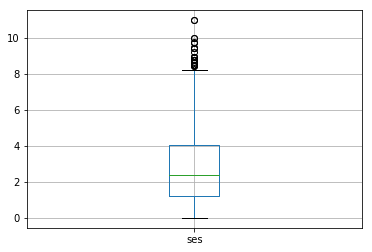

In [115]:
df[['ses']].boxplot()

In [116]:
sum(df['ses']>6.5)

186

In [117]:
df['ses'] = df['ses']<1

In [118]:
df.head(10)

,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,smokehx,ses,race,sex,age,hf,stroke,mi,hba1c,mortstat,metabolic
2,1.6,98.0,66.0,236.0,2.0,no,131.0,73.0,27.600000,no,False,hispanic,female,48.583333,no,no,no,5.3,alive,False
4,11.3,94.0,51.0,260.0,1.0,no,120.0,70.0,25.000000,no,False,non hispanic black,male,48.500000,no,no,no,9.1,alive,False
9,0.4,171.0,42.0,156.0,2.0,no,128.0,73.0,37.000000,no,False,hispanic,female,56.750000,no,no,no,5.0,alive,True
12,1.8,204.0,47.0,244.0,2.0,no,117.0,74.0,25.100000,yes,False,non hispanic black,male,50.166667,no,no,no,5.9,alive,False
14,105.0,479.0,30.0,212.0,1.0,hypertensive,155.0,91.0,37.500000,no,True,non hispanic black,male,48.416667,no,no,no,5.7,dead,True
18,5.4,300.0,46.0,186.0,1.0,no,137.0,68.0,31.100000,no,True,non hispanic white,male,63.666667,no,no,no,5.1,dead,False
22,2.1,81.0,36.0,234.0,2.0,no,105.0,64.0,19.700001,no,False,hispanic,male,58.666667,no,no,no,6.1,alive,False
41,1.7,201.0,47.0,205.0,2.0,no,119.0,72.0,23.600000,yes,False,hispanic,female,63.083333,no,no,no,4.9,alive,True
47,29.6,227.0,36.0,194.0,1.0,hypertensive,151.0,96.0,33.599998,yes,False,non hispanic white,male,55.333333,no,no,no,5.7,alive,True
53,240.0,162.0,35.0,216.0,2.0,no,137.0,94.0,25.900000,no,False,hispanic,male,55.666667,no,no,no,5.3,alive,False


In [119]:
df["sex"] = df["sex"].apply(lambda x: 1 if x == 'male' else 0)
for var in ["ses","metabolic"]:
    df[var] = df[var].apply(lambda x: 1 if x else 0)
for var in ["hf","stroke","mi","htnhx","smokehx"]:
    df[var] = df[var].apply(lambda x: 0 if x == "no" else 1)

In [120]:
df.head()

,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,smokehx,ses,race,sex,age,hf,stroke,mi,hba1c,mortstat,metabolic
2,1.6,98.0,66.0,236.0,2.0,0,131.0,73.0,27.6,0,0,hispanic,0,48.583333,0,0,0,5.3,alive,0
4,11.3,94.0,51.0,260.0,1.0,0,120.0,70.0,25.0,0,0,non hispanic black,1,48.500000,0,0,0,9.1,alive,0
9,0.4,171.0,42.0,156.0,2.0,0,128.0,73.0,37.0,0,0,hispanic,0,56.750000,0,0,0,5.0,alive,1
12,1.8,204.0,47.0,244.0,2.0,0,117.0,74.0,25.1,1,0,non hispanic black,1,50.166667,0,0,0,5.9,alive,0
14,105.0,479.0,30.0,212.0,1.0,1,155.0,91.0,37.5,0,1,non hispanic black,1,48.416667,0,0,0,5.7,dead,1


In [121]:
df.shape

(3378, 20)

In [122]:
df = pd.get_dummies(df, columns=['race'])

In [123]:
df.head()

,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,smokehx,...,hf,stroke,mi,hba1c,mortstat,metabolic,race_hispanic,race_multiracial,race_non hispanic black,race_non hispanic white
2,1.6,98.0,66.0,236.0,2.0,0,131.0,73.0,27.6,0,...,0,0,0,5.3,alive,0,1,0,0,0
4,11.3,94.0,51.0,260.0,1.0,0,120.0,70.0,25.0,0,...,0,0,0,9.1,alive,0,0,0,1,0
9,0.4,171.0,42.0,156.0,2.0,0,128.0,73.0,37.0,0,...,0,0,0,5.0,alive,1,1,0,0,0
12,1.8,204.0,47.0,244.0,2.0,0,117.0,74.0,25.1,1,...,0,0,0,5.9,alive,0,0,0,1,0
14,105.0,479.0,30.0,212.0,1.0,1,155.0,91.0,37.5,0,...,0,0,0,5.7,dead,1,0,0,1,0


In [124]:
df['mortstat'].value_counts()

alive    2659
dead      719
Name: mortstat, dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3378 entries, 2 to 18407
Data columns (total 23 columns):
uralb                      3378 non-null float64
trig                       3378 non-null float64
hdl                        3378 non-null float64
chol                       3378 non-null float64
hldhx                      3378 non-null float64
htnhx                      3378 non-null int64
sbp                        3378 non-null float64
dbp                        3378 non-null float64
bmi                        3378 non-null float64
smokehx                    3378 non-null int64
ses                        3378 non-null int64
sex                        3378 non-null int64
age                        3378 non-null float64
hf                         3378 non-null int64
stroke                     3378 non-null int64
mi                         3378 non-null int64
hba1c                      3378 non-null float64
mortstat                   3378 non-null object
metabolic                

In [137]:
df.shape

(3378, 23)

In [138]:
df.head()

,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,smokehx,...,hf,stroke,mi,hba1c,mortstat,metabolic,race_hispanic,race_multiracial,race_non hispanic black,race_non hispanic white
2,1.6,98.0,66.0,236.0,2.0,0,131.0,73.0,27.6,0,...,0,0,0,5.3,alive,0,1,0,0,0
4,11.3,94.0,51.0,260.0,1.0,0,120.0,70.0,25.0,0,...,0,0,0,9.1,alive,0,0,0,1,0
9,0.4,171.0,42.0,156.0,2.0,0,128.0,73.0,37.0,0,...,0,0,0,5.0,alive,1,1,0,0,0
12,1.8,204.0,47.0,244.0,2.0,0,117.0,74.0,25.1,1,...,0,0,0,5.9,alive,0,0,0,1,0
14,105.0,479.0,30.0,212.0,1.0,1,155.0,91.0,37.5,0,...,0,0,0,5.7,dead,1,0,0,1,0


In [139]:
df[["sbp", "dbp", "bmi", "hdl", "trig"]] = df[["sbp", "dbp", "bmi", "hdl", "trig"]].apply(np.log)

In [140]:
df.head()

,uralb,trig,hdl,chol,hldhx,htnhx,sbp,dbp,bmi,smokehx,...,hf,stroke,mi,hba1c,mortstat,metabolic,race_hispanic,race_multiracial,race_non hispanic black,race_non hispanic white
2,1.6,4.584967,4.189655,236.0,2.0,0,4.875197,4.290459,3.317816,0,...,0,0,0,5.3,alive,0,1,0,0,0
4,11.3,4.543295,3.931826,260.0,1.0,0,4.787492,4.248495,3.218876,0,...,0,0,0,9.1,alive,0,0,0,1,0
9,0.4,5.141664,3.737670,156.0,2.0,0,4.852030,4.290459,3.610918,0,...,0,0,0,5.0,alive,1,1,0,0,0
12,1.8,5.318120,3.850148,244.0,2.0,0,4.762174,4.304065,3.222868,1,...,0,0,0,5.9,alive,0,0,0,1,0
14,105.0,6.171701,3.401197,212.0,1.0,1,5.043425,4.510860,3.624341,0,...,0,0,0,5.7,dead,1,0,0,1,0


In [141]:
df.to_csv("Processed-nhanes3.csv",index=None)